<a href="https://colab.research.google.com/github/Yuniarayu25/Project/blob/main/UTP_Internship_Project_ANTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [59]:
# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10
test_set_size_percentage = 10

In [60]:
#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));

/: ['etc', 'home', 'media', 'sbin', 'root', 'srv', 'opt', 'sys', 'lib32', 'mnt', 'run', 'lib', 'bin', 'libx32', 'boot', 'usr', 'lib64', 'dev', 'var', 'tmp', 'proc', 'content', '.dockerenv', 'tools', 'datalab', 'python-apt', 'NGC-DL-CONTAINER-LICENSE', 'cuda-keyring_1.0-1_all.deb']
/content: ['.config', 'data_preprocessing.py', 'ANTM.JK.csv', 'LSTM EAS.ipynb', '.ipynb_checkpoints', 'sample_data']


In [96]:
df = pd.read_csv('ANTM.JK.csv', index_col = 0)
df.info()
df.head()
df.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 2019-01-01 to 2023-12-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       61 non-null     float64
 1   High       61 non-null     float64
 2   Low        61 non-null     float64
 3   Close      61 non-null     float64
 4   Adj Close  61 non-null     float64
 5   Volume     61 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 3.3+ KB


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-01,1925.0,1980.0,1815.0,1815.0,1815.0,742988000
2023-10-01,1815.0,1860.0,1705.0,1705.0,1705.0,692990400
2023-11-01,1705.0,1740.0,1580.0,1740.0,1740.0,734210600
2023-12-01,1710.0,1810.0,1590.0,1635.0,1635.0,579231200
2023-12-22,1640.0,1665.0,1640.0,1665.0,1665.0,24415400


In [68]:
# Exploratory data analysis
print(df.shape)
print(df.info())
print(df.isnull())

(61, 6)
<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 2019-01-01 to 2023-12-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       61 non-null     float64
 1   High       61 non-null     float64
 2   Low        61 non-null     float64
 3   Close      61 non-null     float64
 4   Adj Close  61 non-null     float64
 5   Volume     61 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 3.3+ KB
None
             Open   High    Low  Close  Adj Close  Volume
Date                                                     
2019-01-01  False  False  False  False      False   False
2019-02-01  False  False  False  False      False   False
2019-03-01  False  False  False  False      False   False
2019-04-01  False  False  False  False      False   False
2019-05-01  False  False  False  False      False   False
...           ...    ...    ...    ...        ...     ...
2023-09-01  False  False  False  False

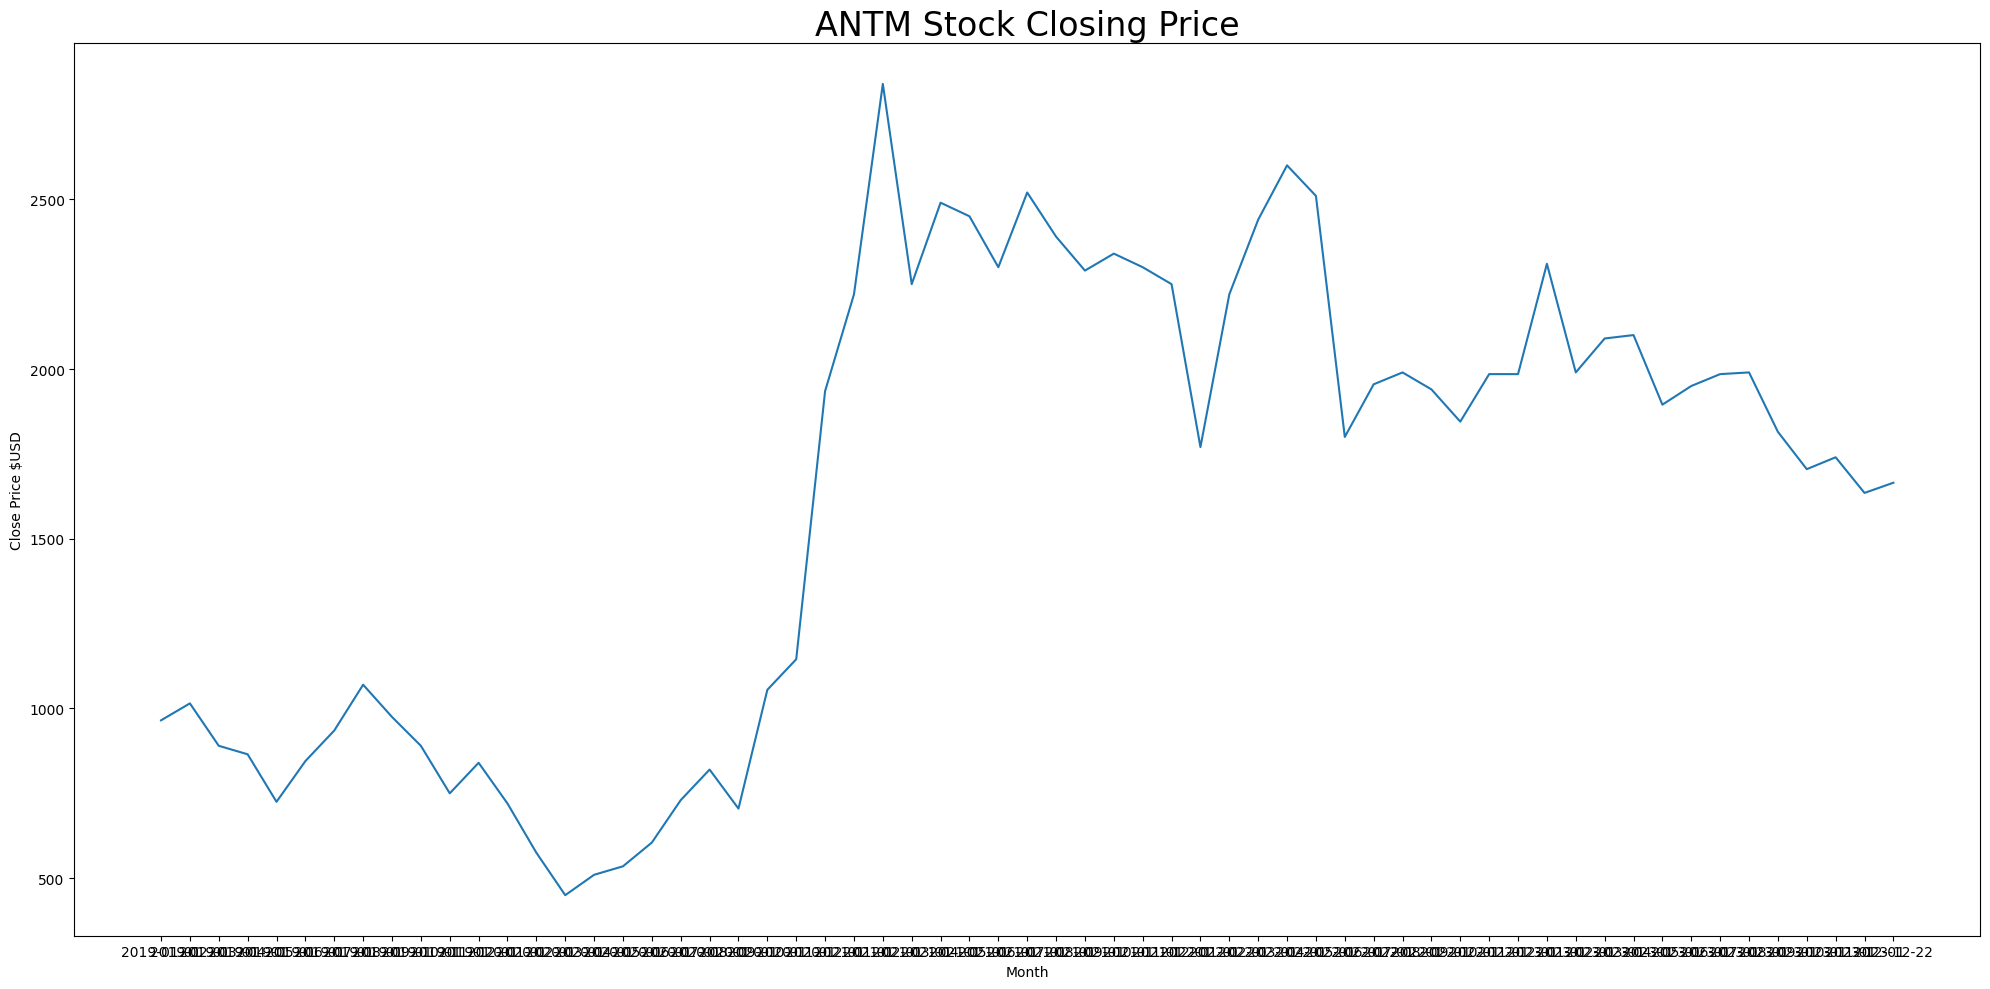

In [69]:
# Visualize the close price
plt.figure(figsize = (20, 10))
plt.plot(df['Close'])
plt.title('ANTM Stock Closing Price', fontsize = 24)
plt.xlabel('Month')
plt.ylabel('Close Price $USD')
plt.tight_layout()
plt.show()

In [27]:
# Create a new dataframe with only the “Close” column
df = df.filter(['Close'])


In [28]:
# Convert the dataframe to a numpy array
dataset = df.values

In [29]:
# Get the number of rows to train the model, 80% of the dataset
training_data_len = math.ceil(len(dataset) * .80)
training_data_len

49

In [35]:
# Scaling the dataset
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['close'] = min_max_scaler.fit_transform(min_max_scaler.)
    return df

In [70]:
# Scaling the dataset
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(df['Close'].values.reshape(-1,1))
scaled_data

array([[0.21548117],
       [0.23640167],
       [0.18410042],
       [0.17364017],
       [0.11506276],
       [0.16527197],
       [0.20292887],
       [0.25941423],
       [0.21966527],
       [0.18410042],
       [0.12552301],
       [0.16317992],
       [0.11297071],
       [0.05230126],
       [0.        ],
       [0.0251046 ],
       [0.03556485],
       [0.06485356],
       [0.11715481],
       [0.15481172],
       [0.10669456],
       [0.25313808],
       [0.29079498],
       [0.62133891],
       [0.74058577],
       [1.        ],
       [0.75313808],
       [0.85355649],
       [0.83682008],
       [0.77405858],
       [0.86610879],
       [0.81171548],
       [0.76987448],
       [0.79079498],
       [0.77405858],
       [0.75313808],
       [0.55230126],
       [0.74058577],
       [0.83263598],
       [0.89958159],
       [0.86192469],
       [0.56485356],
       [0.62970711],
       [0.64435146],
       [0.62343096],
       [0.58368201],
       [0.64225941],
       [0.642

In [111]:
# x_train is independent variable, y_train is dependentt variable
x_train = []
y_train = []

In [113]:
# First pass through x_train will contain 60 data indexed 0 to 59
# Then y_train for the pass through will contain 1data indexed 60
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
    print(x_train)
    print(y_train)

IndentationError: ignored

In [74]:
# Convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the dataset
# LSTM network expect to be 3 dimentional input
# Shape:(number of samples, number of time steps, number of feature)
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

IndexError: ignored

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (
X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the LSTM model
model.compile(optimizer = ‘adam’, loss = ‘mean_squared_error’)

In [ ]:
# Training the LSTM model
model.fit(x_train, y_train, batch_size = 1, epochs = 3)

In [ ]:
# Create testing dataset
# Create new array containing scaled value for testing dataset
test_data = scaled[training_data_len - 60:, :]
# Create the dataset x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, lne(test_data)):
x_test_append(test_data[i-60:i, 0])

In [ ]:
# Convert the data to numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the dataset
# LSTM network expect to be 3 dimentional input
# Shape:(number of samples, number of time steps, number of feature)
x_test = np.reshapee(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

In [ ]:
# Predict the LSTM model
lstm_prediction = model.predict(x_test)

In [ ]:
inverse the scaling data
lstm_prediction = scaler.inverse_transform(lstm_prediction)